In [ ]:
# Christine Orosco
# Cancer Observed, Expected and Excess Deaths EDA

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Read in the flat file

In [ ]:
# Read in csv flat file in DF
df = pd.read_csv('~DSC540/Excess_deaths.csv')
df.shape

In [3]:
df.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8


In [4]:
df.tail()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
205915,2015,Unintentional Injury,Wyoming,WY,8,0-84,2010 Fixed,Metropolitan,93.0,175787.0,36.0,57.0,61.3
205916,2015,Unintentional Injury,Wyoming,WY,8,0-84,2010 Fixed,Nonmetropolitan,259.0,400056.0,82.0,177.0,68.3
205917,2015,Unintentional Injury,Wyoming,WY,8,0-84,Floating,All,352.0,575843.0,137.0,215.0,61.1
205918,2015,Unintentional Injury,Wyoming,WY,8,0-84,Floating,Metropolitan,93.0,175787.0,42.0,51.0,54.8
205919,2015,Unintentional Injury,Wyoming,WY,8,0-84,Floating,Nonmetropolitan,259.0,400056.0,96.0,163.0,62.9


In [5]:
# Create a Subset of the data

In [6]:
# Select the rows where Cause of Death = Cancer and year >= 2014
df_subset = df[(df['Cause of Death'] == 'Cancer') & (df['Year'] >= 2014) & (df['State'] != 'United States')].copy()
df_subset.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
164626,2014,Cancer,Arizona,AZ,9,0-54,2005 Fixed,All,1113.0,4867353.0,1020.0,98.0,8.8
164896,2014,Cancer,Alabama,AL,4,0-54,2005 Fixed,All,1138.0,3475969.0,775.0,363.0,31.9
165344,2014,Cancer,Alaska,AK,10,0-59,2005 Fixed,All,252.0,625271.0,216.0,41.0,16.3
165355,2014,Cancer,Arkansas,AR,6,0-59,2005 Fixed,All,1272.0,2325270.0,838.0,437.0,34.4
165424,2014,Cancer,California,CA,9,0-64,2005 Fixed,All,17447.0,33809453.0,17833.0,231.0,1.3


In [7]:
# Reset the index
df_subset.reset_index(drop=True, inplace=True)

In [8]:
pd.set_option('display.max_rows', 20)
df_subset

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2014,Cancer,Arizona,AZ,9,0-54,2005 Fixed,All,1113.0,4867353.0,1020.0,98.0,8.8
1,2014,Cancer,Alabama,AL,4,0-54,2005 Fixed,All,1138.0,3475969.0,775.0,363.0,31.9
2,2014,Cancer,Alaska,AK,10,0-59,2005 Fixed,All,252.0,625271.0,216.0,41.0,16.3
3,2014,Cancer,Arkansas,AR,6,0-59,2005 Fixed,All,1272.0,2325270.0,838.0,437.0,34.4
4,2014,Cancer,California,CA,9,0-64,2005 Fixed,All,17447.0,33809453.0,17833.0,231.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,2015,Cancer,Wyoming,WY,8,0-84,2010 Fixed,Metropolitan,235.0,175787.0,231.0,15.0,6.4
7340,2015,Cancer,Wyoming,WY,8,0-84,2010 Fixed,Nonmetropolitan,533.0,400056.0,553.0,3.0,0.6
7341,2015,Cancer,Wyoming,WY,8,0-84,Floating,All,768.0,575843.0,730.0,38.0,4.9
7342,2015,Cancer,Wyoming,WY,8,0-84,Floating,Metropolitan,235.0,175787.0,215.0,27.0,11.5


## Delete Unnecessary Data

In [10]:
# Delete unnecessary columns
df_subset.drop(columns=['HHS Region', 'Benchmark', 'Cause of Death', 'Age Range'], inplace=True)

In [11]:
# Display column names
df_subset.columns



Index(['Year', 'State', 'State FIPS Code', 'Locality', 'Observed Deaths',
       'Population', 'Expected Deaths', 'Potentially Excess Deaths',
       'Percent Potentially Excess Deaths'],
      dtype='object')

## Change Headers

In [13]:
# Change column names in the df subset
df_subset.rename(columns={
                          'Observed Deaths': 'Observed_Deaths',
                          'State FIPS Code': 'State_Code',
                          'Potentially Excess Deaths': 'Potentially_Excess_Deaths',
                          'Percent Potentially Excess Deaths': 'Percent_Potentially_Excess_Deaths',
                          'Expected Deaths': 'Expected_Deaths'},
                 inplace=True)

In [14]:
df_subset.head()


,Year,State,State_Code,Locality,Observed_Deaths,Population,Expected_Deaths,Potentially_Excess_Deaths,Percent_Potentially_Excess_Deaths
0,2014,Arizona,AZ,All,1113.0,4867353.0,1020.0,98.0,8.8
1,2014,Alabama,AL,All,1138.0,3475969.0,775.0,363.0,31.9
2,2014,Alaska,AK,All,252.0,625271.0,216.0,41.0,16.3
3,2014,Arkansas,AR,All,1272.0,2325270.0,838.0,437.0,34.4
4,2014,California,CA,All,17447.0,33809453.0,17833.0,231.0,1.3


## Delete Duplicate rows in the subset

In [16]:
# drop duplicate rows
df_subset.drop_duplicates(inplace=True)
df_subset.shape
df_subset.head()

,Year,State,State_Code,Locality,Observed_Deaths,Population,Expected_Deaths,Potentially_Excess_Deaths,Percent_Potentially_Excess_Deaths
0,2014,Arizona,AZ,All,1113.0,4867353.0,1020.0,98.0,8.8
1,2014,Alabama,AL,All,1138.0,3475969.0,775.0,363.0,31.9
2,2014,Alaska,AK,All,252.0,625271.0,216.0,41.0,16.3
3,2014,Arkansas,AR,All,1272.0,2325270.0,838.0,437.0,34.4
4,2014,California,CA,All,17447.0,33809453.0,17833.0,231.0,1.3


## Check Case Consistency

In [17]:

# Upper Case State_Codes
df_subset['State_upper'] = list(map(lambda x: x.isupper(), df_subset['State_Code']))
notmet = df_subset[df_subset['State_upper'] == 0]
notmet.head()

,Year,State,State_Code,Locality,Observed_Deaths,Population,Expected_Deaths,Potentially_Excess_Deaths,Percent_Potentially_Excess_Deaths,State_upper


In [18]:
# Change State Code 0 to US
# df_subset.loc[df_subset['State_Code'] ==  0]
# df_subset['State_Code'] = df_subset['State_Code'].replace({0:'US'}, inplace=True)
# Couldn't get this to work


In [19]:
# - Check for consistent Locatility values
local_list = ['All', 'Metropolitan', 'Nonmetropolitan']
df_subset['Locality_check'] = list(map(lambda x: x in local_list, df_subset['Locality']))
notmet = df_subset[df_subset['Locality_check'] == 0]
notmet.head()

,Year,State,State_Code,Locality,Observed_Deaths,Population,Expected_Deaths,Potentially_Excess_Deaths,Percent_Potentially_Excess_Deaths,State_upper,Locality_check


In [20]:

df_subset.head()

,Year,State,State_Code,Locality,Observed_Deaths,Population,Expected_Deaths,Potentially_Excess_Deaths,Percent_Potentially_Excess_Deaths,State_upper,Locality_check
0,2014,Arizona,AZ,All,1113.0,4867353.0,1020.0,98.0,8.8,True,True
1,2014,Alabama,AL,All,1138.0,3475969.0,775.0,363.0,31.9,True,True
2,2014,Alaska,AK,All,252.0,625271.0,216.0,41.0,16.3,True,True
3,2014,Arkansas,AR,All,1272.0,2325270.0,838.0,437.0,34.4,True,True
4,2014,California,CA,All,17447.0,33809453.0,17833.0,231.0,1.3,True,True


## Handle Missing Values

In [22]:

# For each column count the number of missing values in the DF
df_subset.isnull().sum()

Year                                 0
State                                0
State_Code                           0
Locality                             0
Observed_Deaths                      8
Population                           8
Expected_Deaths                      8
Potentially_Excess_Deaths            8
Percent_Potentially_Excess_Deaths    8
State_upper                          0
Locality_check                       0
dtype: int64

In [23]:
# Display the rows with missing data - 
df_subset[df_subset.isna().any(axis=1)]

,Year,State,State_Code,Locality,Observed_Deaths,Population,Expected_Deaths,Potentially_Excess_Deaths,Percent_Potentially_Excess_Deaths,State_upper,Locality_check
515,2014,Delaware,DE,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN,True,True
585,2014,District of\nColumbia,DC,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN,True,True
2162,2014,New Jersey,NJ,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN,True,True
2810,2014,Rhode Island,RI,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN,True,True
4188,2015,Delaware,DE,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN,True,True
4260,2015,District of\nColumbia,DC,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN,True,True
5834,2015,New Jersey,NJ,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN,True,True
6483,2015,Rhode Island,RI,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN,True,True


In [24]:
# May need to change NaN to zeros or derive values from previous years.
# View previous years to
state_list = ['DE', 'DC', 'NJ', 'RI']
df_prevyears = df[(df['Cause of Death'] == 'Cancer') & (df['Year'] <= 2013) & (df['State FIPS Code'].isin(state_list))].copy()
df_prevyears

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
504,2005,Cancer,Delaware,DE,3,0-49,2005 Fixed,All,106.0,583236.0,85.0,24.0,22.6
505,2005,Cancer,Delaware,DE,3,0-49,2005 Fixed,Metropolitan,106.0,583236.0,85.0,24.0,22.6
506,2005,Cancer,Delaware,DE,3,0-49,2005 Fixed,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
507,2005,Cancer,Delaware,DE,3,0-49,2010 Fixed,All,106.0,583236.0,80.0,28.0,26.4
508,2005,Cancer,Delaware,DE,3,0-49,2010 Fixed,Metropolitan,106.0,583236.0,80.0,28.0,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,2013,Cancer,Rhode Island,RI,1,0-84,2010 Fixed,Metropolitan,1810.0,1023183.0,1448.0,365.0,20.2
152636,2013,Cancer,Rhode Island,RI,1,0-84,2010 Fixed,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
152637,2013,Cancer,Rhode Island,RI,1,0-84,Floating,All,1810.0,1023183.0,1392.0,421.0,23.3
152638,2013,Cancer,Rhode Island,RI,1,0-84,Floating,Metropolitan,1810.0,1023183.0,1392.0,421.0,23.3


In [25]:
# Check for NaN values in prevous years
# Appears that these states do not have reported values for nonmetropolitan areas
df_prevyears.isnull().sum() 

Year                                   0
Cause of Death                         0
State                                  0
State FIPS Code                        0
HHS Region                             0
Age Range                              0
Benchmark                              0
Locality                               0
Observed Deaths                      864
Population                           864
Expected Deaths                      864
Potentially Excess Deaths            864
Percent Potentially Excess Deaths    864
dtype: int64

In [26]:
# Check the nonmetropolitan rows
nonmet = df_prevyears[df_prevyears['Locality'] == 'Nonmetropolitan']
nonmet['State FIPS Code'].unique()

array(['DE', 'DC', 'NJ', 'RI'], dtype=object)

In [27]:
# Because 4 States do not have values for nonmetropolitan, will check other data sources for values

## Reshape the data by combining observations by State, Year and Locality

In [76]:
# For each state combine the Locality observations into three seperate rows because not going to use the HHS region. Only using the totals for metro and non-metro areas
# Create pivot table to aggregate each locality number
col_list = ['Observed_Deaths', 'Population', 'Expected_Deaths',
       'Potentially_Excess_Deaths', 'Percent_Potentially_Excess_Deaths']

df_pivot = df_subset.pivot_table(index=['Year', 'State_Code'], columns='Locality', values=col_list, aggfunc=sum)
df_pivot

Expected_Deaths                              Observed_Deaths  \
Locality                    All Metropolitan Nonmetropolitan             All   
Year State_Code                                                                
2014 AK                  9618.0       6178.0          3403.0         11037.0   
     AL                 76163.0      56636.0         19527.0        105675.0   
     AR                 46043.0      26386.0         19650.0         65784.0   
     AZ                102820.0      97111.0          5711.0        106986.0   
     CA                540349.0     524776.0         15576.0        548517.0   
...                         ...          ...             ...             ...   
2015 VT                 10940.0       3282.0          7660.0         12972.0   
     WA                108307.0      95175.0         13128.0        117654.0   
     WI                 91150.0      64206.0         26942.0        102003.0   
     WV                 32212.0      19219.0         12993.0         47406.0   
     WY                  8940.0       2639.0          6303.0          8700.0   

                                              \
Locality        Metropolitan Nonmetropolitan   
Year State_Code                                
2014 AK               6852.0          4137.0   
     AL              76464.0         29211.0   
     AR              35679.0         30105.0   
     AZ             101478.0          5508.0   
     CA             531036.0         17481.0   
...                      ...             ...   
2015 VT               3705.0          9267.0   
     WA             101973.0         15681.0   
     WI              70308.0         31695.0   
     WV              28209.0         19197.0   
     WY               2676.0          6024.0   

                Percent_Potentially_Excess_Deaths               \
Locality                                      All Metropolitan   
Year State_Code                                                  
2014 AK                                     371.5        334.4   
     AL                                     740.5        694.4   
     AR                                     784.7        670.6   
     AZ                                     206.8        215.1   
     CA                                     137.5        133.3   
...                                           ...          ...   
2015 VT                                     395.2        333.5   
     WA                                     219.9        189.1   
     WI                                     275.9        230.0   
     WV                                     825.4        801.8   
     WY                                      53.1        177.1   

                                  Population                               \
Locality        Nonmetropolitan          All Metropolitan Nonmetropolitan   
Year State_Code                                                             
2014 AK                   474.6   15762231.0   10738815.0       4844330.0   
     AL                   871.4   98584620.0   75517581.0      23067039.0   
     AR                   936.5   60216000.0   37603665.0      22612335.0   
     AZ                   220.7  136871601.0  129924657.0       6946944.0   
     CA                   341.2  807586629.0  791482749.0      16103880.0   
...                         ...          ...          ...             ...   
2015 VT                   457.8   12369387.0    4445340.0       7924047.0   
     WA                   458.4  146927250.0  132955461.0      13971789.0   
     WI                   393.3  116414547.0   87214530.0      29200017.0   
     WV                   863.6   36394473.0   22640328.0      13754145.0   
     WY                    97.1   11976111.0    3679551.0       8296560.0   

                Potentially_Excess_Deaths                               
Locality                              All Metropolitan Nonmetropolitan  
Year State_Code                                                         

In [30]:
# Flatten the pivot_table to join the Locality category in the observation type header names
df_pivot.columns = [' '.join(col) for col in df_pivot.columns.values]

In [31]:
df_pivot.columns

Index(['Expected_Deaths All', 'Expected_Deaths Metropolitan',
       'Expected_Deaths Nonmetropolitan', 'Observed_Deaths All',
       'Observed_Deaths Metropolitan', 'Observed_Deaths Nonmetropolitan',
       'Percent_Potentially_Excess_Deaths All',
       'Percent_Potentially_Excess_Deaths Metropolitan',
       'Percent_Potentially_Excess_Deaths Nonmetropolitan', 'Population All',
       'Population Metropolitan', 'Population Nonmetropolitan',
       'Potentially_Excess_Deaths All',
       'Potentially_Excess_Deaths Metropolitan',
       'Potentially_Excess_Deaths Nonmetropolitan'],
      dtype='object')

In [32]:
# Sort the Dataframe
df_pivot.sort_index(inplace=True)
df_pivot.query('Year == 2014')

Expected_Deaths All  Expected_Deaths Metropolitan  \
Year State_Code                                                      
2014 AK                       9618.0                        6178.0   
     AL                      76163.0                       56636.0   
     AR                      46043.0                       26386.0   
     AZ                     102820.0                       97111.0   
     CA                     540349.0                      524776.0   
...                              ...                           ...   
     VT                      10845.0                        3240.0   
     WA                     106000.0                       93091.0   
     WI                      90072.0                       63327.0   
     WV                      32177.0                       19185.0   
     WY                       8859.0                        2582.0   

                 Expected_Deaths Nonmetropolitan  Observed_Deaths All  \
Year State_Code                                                         
2014 AK                                   3403.0              11037.0   
     AL                                  19527.0             105675.0   
     AR                                  19650.0              65784.0   
     AZ                                   5711.0             106986.0   
     CA                                  15576.0             548517.0   
...                                          ...                  ...   
     VT                                   7608.0              12753.0   
     WA                                  12911.0             114786.0   
     WI                                  26742.0             102246.0   
     WV                                  12992.0              48615.0   
     WY                                   6249.0               8979.0   

                 Observed_Deaths Metropolitan  \
Year State_Code                                 
2014 AK                                6852.0   
     AL                               76464.0   
     AR                               35679.0   
     AZ                              101478.0   
     CA                              531036.0   
...                                       ...   
     VT                                3633.0   
     WA                               99771.0   
     WI                               72105.0   
     WV                               29391.0   
     WY                                2665.0   

                 Observed_Deaths Nonmetropolitan  \
Year State_Code                                    
2014 AK                                   4137.0   
     AL                                  29211.0   
     AR                                  30105.0   
     AZ                                   5508.0   
     CA                                  17481.0   
...                                          ...   
     VT                                   9120.0   
     WA                                  15015.0   
     WI                                  30141.0   
     WV                                  19224.0   
     WY                                   6291.0   

                 Percent_Potentially_Excess_Deaths All  \
Year State_Code                                          
2014 AK                                          371.5   
     AL                                          740.5   
     AR                                          784.7   
     AZ                                          206.8   
     CA                                          137.5   
...                                                ...   
     VT                                          429.3   
     WA                                          234.6   
     WI                                          289.6   
     WV                                          886.9   
     WY                                          101.0   

                 Percent_Potentially_Excess_Deaths Metropolitan  \
Year State_Code    

## Find outliers or anonmalies in the counts

In [34]:
# do not include the 0 State_code which is the totals row.
# Compute Mean for Expected_Deaths_All
df_pivot.iloc[0:51,2].mean()


15346.941176470587

In [35]:
df_pivot.iloc[52:,1].mean()

81388.78

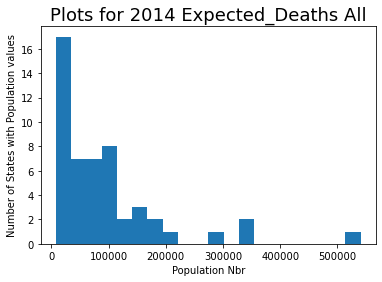

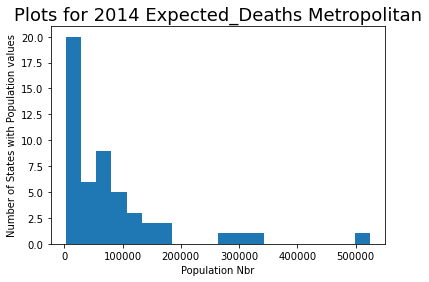

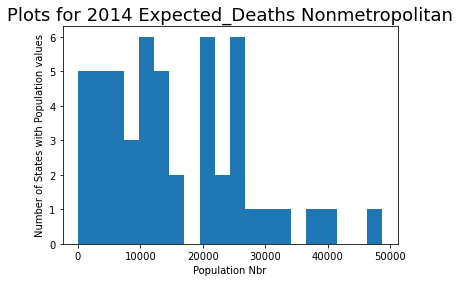

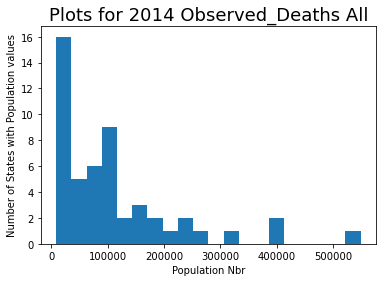

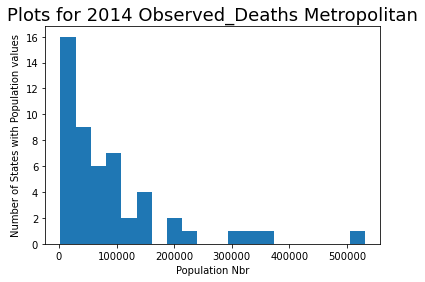

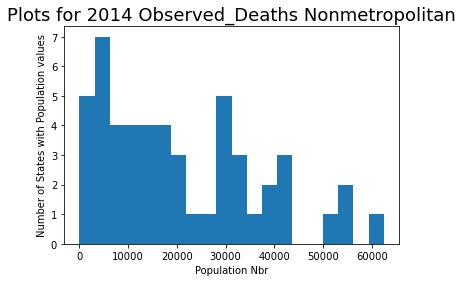

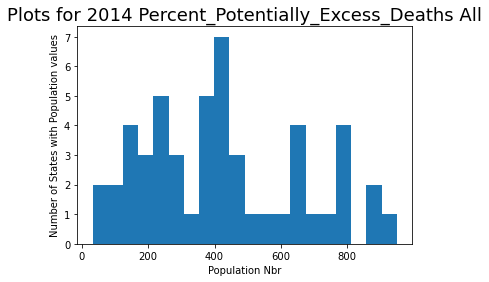

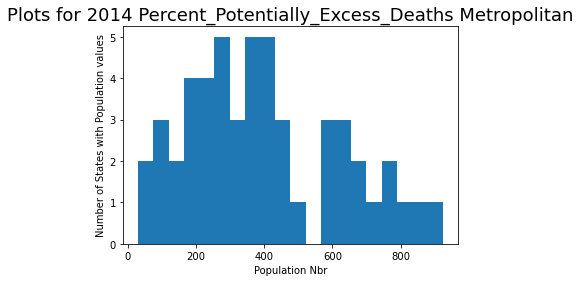

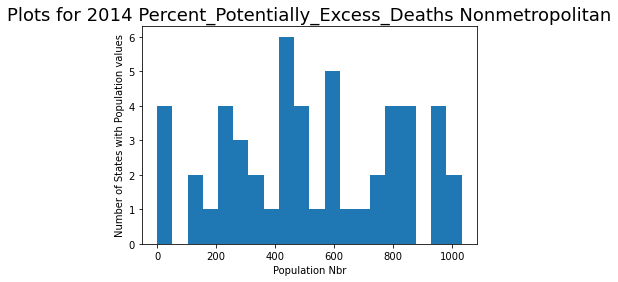

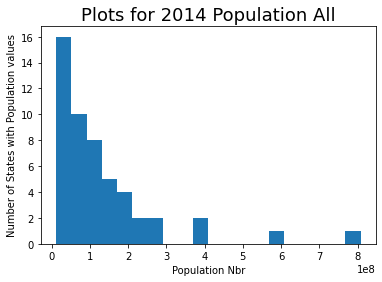

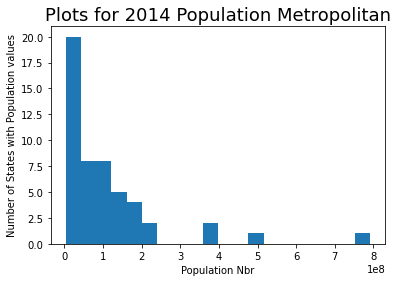

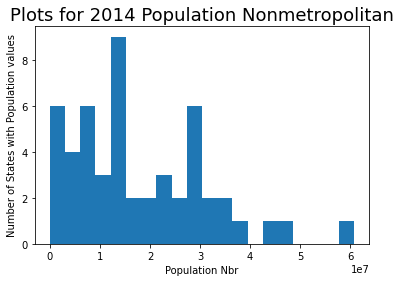

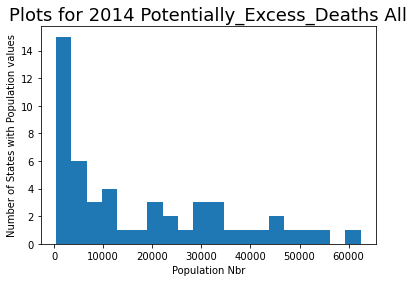

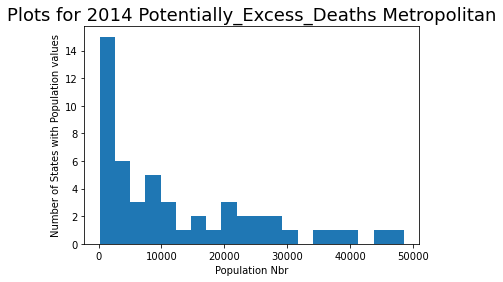

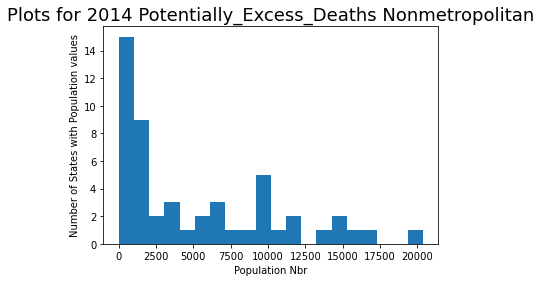

In [36]:
# Create histograms to visually identify outliers or anomalies
 # Create histograms for each column in the pivot df
for x in df_pivot.columns:
    plt.title( "Plots for 2014 " +x, fontsize=18)
    plt.hist(df_pivot.iloc[0:51,0:][x], bins=20)
    plt.xlabel('Population Nbr')
    plt.ylabel("Number of States with Population values")
    plt.show()   

## Compute zscores to find outliers



In [ ]:
from scipy import stats

In [38]:
# Computer zscores for year 2014 "Expected Deaths All"
df_2014 = df_pivot.query('Year == 2014')
df_2014

Expected_Deaths All  Expected_Deaths Metropolitan  \
Year State_Code                                                      
2014 AK                       9618.0                        6178.0   
     AL                      76163.0                       56636.0   
     AR                      46043.0                       26386.0   
     AZ                     102820.0                       97111.0   
     CA                     540349.0                      524776.0   
...                              ...                           ...   
     VT                      10845.0                        3240.0   
     WA                     106000.0                       93091.0   
     WI                      90072.0                       63327.0   
     WV                      32177.0                       19185.0   
     WY                       8859.0                        2582.0   

                 Expected_Deaths Nonmetropolitan  Observed_Deaths All  \
Year State_Code                                                         
2014 AK                                   3403.0              11037.0   
     AL                                  19527.0             105675.0   
     AR                                  19650.0              65784.0   
     AZ                                   5711.0             106986.0   
     CA                                  15576.0             548517.0   
...                                          ...                  ...   
     VT                                   7608.0              12753.0   
     WA                                  12911.0             114786.0   
     WI                                  26742.0             102246.0   
     WV                                  12992.0              48615.0   
     WY                                   6249.0               8979.0   

                 Observed_Deaths Metropolitan  \
Year State_Code                                 
2014 AK                                6852.0   
     AL                               76464.0   
     AR                               35679.0   
     AZ                              101478.0   
     CA                              531036.0   
...                                       ...   
     VT                                3633.0   
     WA                               99771.0   
     WI                               72105.0   
     WV                               29391.0   
     WY                                2665.0   

                 Observed_Deaths Nonmetropolitan  \
Year State_Code                                    
2014 AK                                   4137.0   
     AL                                  29211.0   
     AR                                  30105.0   
     AZ                                   5508.0   
     CA                                  17481.0   
...                                          ...   
     VT                                   9120.0   
     WA                                  15015.0   
     WI                                  30141.0   
     WV                                  19224.0   
     WY                                   6291.0   

                 Percent_Potentially_Excess_Deaths All  \
Year State_Code                                          
2014 AK                                          371.5   
     AL                                          740.5   
     AR                                          784.7   
     AZ                                          206.8   
     CA                                          137.5   
...                                                ...   
     VT                                          429.3   
     WA                                          234.6   
     WI                                          289.6   
     WV                                          886.9   
     WY                                          101.0   

                 Percent_Potentially_Excess_Deaths Metropolitan  \
Year State_Code    

In [43]:
# Print zcores
zscore_2014 = stats.zscore(df_2014.iloc[:,1])
zscore_2014

array([-0.74821394, -0.22669078, -0.53934835,  0.19165023,  4.61190481,
       -0.13867121, -0.26067484, -0.72669483, -0.65440634,  2.57466941,
        0.3620977 , -0.63497506, -0.54483665, -0.65201877,  0.88114028,
       -0.04113238, -0.52921928, -0.41762378, -0.22668044,  0.24624386,
        0.08373427, -0.67304176,  0.47912982, -0.18773519, -0.11117801,
       -0.60910458, -0.75428105,  0.36402016, -0.76332487, -0.64368812,
       -0.67370325,  0.604813  , -0.59181281, -0.41980463,  2.01882109,
        0.67312222, -0.43971136, -0.28204925,  1.06229563, -0.64110418,
       -0.14810778, -0.75133535, -0.02919455,  2.33635715, -0.51047016,
        0.26600588, -0.77858049,  0.15010036, -0.15753402, -0.61377636,
       -0.78538144])

In [44]:
# Display zscores GT than 3 or less than -3

bad_list = []
bad_list = [x for x in zscore_2014 if x > 3 or x < -3]
print(bad_list)       

[4.611904813199927]


In [ ]:
# The zscore shows California with a zscore over 3 for Expected Deaths All 2014.
# Calculate 2015 zscore for comparison

In [45]:
# Computer zscores for year 2015 "Expected Deaths All"
df_2015 = df_pivot.query('Year == 2015')
df_2015

Expected_Deaths All  Expected_Deaths Metropolitan  \
Year State_Code                                                      
2015 AK                       9699.0                        6239.0   
     AL                      76859.0                       57272.0   
     AR                      46424.0                       26799.0   
     AZ                     105356.0                       99602.0   
     CA                     550846.0                      535135.0   
...                              ...                           ...   
     VT                      10940.0                        3282.0   
     WA                     108307.0                       95175.0   
     WI                      91150.0                       64206.0   
     WV                      32212.0                       19219.0   
     WY                       8940.0                        2639.0   

                 Expected_Deaths Nonmetropolitan  Observed_Deaths All  \
Year State_Code                                                         
2015 AK                                   3354.0              11043.0   
     AL                                  19587.0             105708.0   
     AR                                  19627.0              67029.0   
     AZ                                   5755.0             109086.0   
     CA                                  15710.0             555861.0   
...                                          ...                  ...   
     VT                                   7660.0              12972.0   
     WA                                  13128.0             117654.0   
     WI                                  26942.0             102003.0   
     WV                                  12993.0              47406.0   
     WY                                   6303.0               8700.0   

                 Observed_Deaths Metropolitan  \
Year State_Code                                 
2015 AK                                7077.0   
     AL                               77061.0   
     AR                               37557.0   
     AZ                              103224.0   
     CA                              538362.0   
...                                       ...   
     VT                                3705.0   
     WA                              101973.0   
     WI                               70308.0   
     WV                               28209.0   
     WY                                2676.0   

                 Observed_Deaths Nonmetropolitan  \
Year State_Code                                    
2015 AK                                   3921.0   
     AL                                  28647.0   
     AR                                  29472.0   
     AZ                                   5862.0   
     CA                                  17499.0   
...                                          ...   
     VT                                   9267.0   
     WA                                  15681.0   
     WI                                  31695.0   
     WV                                  19197.0   
     WY                                   6024.0   

                 Percent_Potentially_Excess_Deaths All  \
Year State_Code                                          
2015 AK                                          333.6   
     AL                                          718.9   
     AR                                          810.4   
     AZ                                          192.2   
     CA                                          127.4   
...                                                ...   
     VT                                          395.2   
     WA                                          219.9   
     WI                                          275.9   
     WV                                          825.4   
     WY                                           53.1   

                 Percent_Potentially_Excess_Deaths Metropolitan  \
Year State_Code    

In [63]:
# Print zcores
zscore_2015 = stats.zscore(df_2015['Expected_Deaths All'])
zscore_2015

array([-8.27748071e-01, -1.78609409e-01, -4.72780570e-01,  9.68299073e-02,
        4.40273793e+00, -1.62525925e-01, -3.68479568e-01, -8.40477607e-01,
       -7.70585980e-01,  2.44785047e+00,  4.79721196e-01, -7.09393352e-01,
       -4.55488892e-01, -6.84968495e-01,  9.22954544e-01,  4.10983182e-02,
       -5.10998174e-01, -2.51487692e-01, -2.54097392e-01,  1.00647801e-01,
       -4.40068921e-02, -6.87230235e-01,  6.15203278e-01, -1.18895611e-01,
       -3.84651178e-03, -4.86669972e-01, -7.54096543e-01,  5.74443634e-01,
       -8.18971747e-01, -6.53980726e-01, -7.01863885e-01,  4.17127063e-01,
       -6.07305762e-01, -4.95726597e-01,  1.98388450e+00,  8.61887569e-01,
       -3.61694348e-01, -2.93706836e-01,  1.10275320e+00, -7.60079522e-01,
       -1.57064887e-01, -7.95716422e-01,  7.80593999e-02,  2.57396663e+00,
       -5.90246058e-01,  2.95689032e-01, -8.15753118e-01,  1.25352960e-01,
       -4.04789646e-02, -6.10147435e-01, -8.35084227e-01])

In [65]:
# Display zscores GT than 3 or less than -3

bad_list = []
bad_list = [x for x in zscore_2015 if x > 3 or x > -3]
print(bad_list) 

[-0.8277480711228766, -0.1786094086790072, -0.4727805699577321, 0.09682990733741546, 4.402737928959205, -0.1625259254403741, -0.3684795677773897, -0.8404776068351841, -0.7705859798528789, 2.4478504677433035, 0.47972119640905697, -0.7093933522183921, -0.4554888923652354, -0.6849684951606843, 0.9229545442900653, 0.04109831818239237, -0.5109981737591476, -0.2514876921040634, -0.2540973919084089, 0.10064780149562463, -0.04400689210376413, -0.687230234991117, 0.6152032784739128, -0.11889561093364948, -0.003846511781335936, -0.4866699722497488, -0.7540965433113477, 0.5744436337519682, -0.818971747336411, -0.653980726372789, -0.7018638850051138, 0.4171270633240882, -0.607305762094328, -0.49572659712631084, 1.983884504749995, 0.8618875688683802, -0.36169434828609137, -0.2937068356054753, 1.1027531952546403, -0.7600795217516805, -0.15706488696091034, -0.7957164224132431, 0.07805939985578958, 2.5739666271770085, -0.590246057817773, 0.29568903242854366, -0.8157531175777182, 0.12535295964342885, -

In [72]:

# Check zscores for other features
zscore_2015 = stats.zscore(df_2015['Observed_Deaths All'])
zscore_2015

array([-8.90443170e-01, -4.82799333e-02, -3.92377877e-01, -1.82284104e-02,
        3.95639241e+00, -3.42309798e-01, -4.71082976e-01, -8.90149594e-01,
       -8.22947343e-01,  2.57599733e+00,  5.88780326e-01, -7.88785754e-01,
       -4.74258936e-01, -7.59294695e-01,  1.09343774e+00,  1.91545098e-01,
       -5.31559664e-01, -4.06736420e-02, -1.13613972e-01, -1.28105959e-03,
       -7.79845026e-02, -7.20035556e-01,  7.76348801e-01, -2.00272316e-01,
        1.29413707e-01, -3.93285294e-01, -8.12832310e-01,  7.05410126e-01,
       -8.84358137e-01, -7.11708669e-01, -7.57800125e-01,  3.03584434e-01,
       -6.84139199e-01, -5.54084962e-01,  1.85721614e+00,  1.17136886e+00,
       -2.53329534e-01, -3.32781917e-01,  1.28556999e+00, -8.17823105e-01,
       -9.11420521e-02, -8.60391647e-01,  3.14473441e-01,  2.59177037e+00,
       -7.27935424e-01,  2.98647017e-01, -8.73282310e-01,  5.79946352e-02,
       -8.12405290e-02, -5.66948935e-01, -9.11287077e-01])

In [73]:
# Check summary statistics of Cancer - Expected Deaths All 2015
df_2015['Expected_Deaths All'].describe()

count        51.000000
mean      95337.960784
std      104489.655432
min        8382.000000
25%       26074.000000
50%       69049.000000
75%      107029.000000
max      550846.000000
Name: Expected_Deaths All, dtype: float64

In [74]:
# Check summary statistics of Cancer - Expected Deaths All 2014
df_2014['Expected_Deaths All'].describe()

count        51.000000
mean      93917.647059
std      102559.209756
min        8260.000000
25%       25696.000000
50%       68254.000000
75%      105117.000000
max      540349.000000
Name: Expected_Deaths All, dtype: float64